In [1]:
import numpy as np
import pandas as pd
import re
#import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix
import math
from sklearn.cluster import DBSCAN	
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture 

In [2]:
# 파일 읽기
train = pd.read_csv('train.csv')

# 결과값 넣을 set 준비
result = train['ID']
train = train.drop(['ID'], axis = 1)

In [3]:
train['area_1'] = train[['UA11', 'UA12', 'UA13', 'UA14', 'UA15', 'UA10', 'UA9', 'UA8', 'UA7', 'UA6', 'UA5', 'UA4']].min(axis=1)

train['area_2'] = train[['UA5', 'UA6', 'UA7', 'UA8', 'UA9']].min(axis=1)

train['area_3'] = train[['UA20', 'UA19', 'UA18', 'UA17']].min(axis=1)

train['area_4'] = train[['UA23','UA24']].min(axis=1)

#train['un'] = train[['UA3', 'UA2', 'UA1', 'UA24', 'UA23', 'UA22', 'UA21']].min(axis=1)

train = train[['area_1', 'area_3']]

train

,area_1,area_3
0,1.687,0.445
1,1.687,0.449
2,1.687,0.449
3,1.687,0.449
4,1.687,0.449
...,...,...
5451,1.024,0.648
5452,0.894,0.640
5453,0.873,0.633
5454,0.967,0.626


In [4]:

scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns) # scaled된 데이터

scaler = PCA(n_components=2)
train = pd.DataFrame(scaler.fit_transform(train))

scaler = PowerTransformer()
train = pd.DataFrame(scaler.fit_transform(train))

#scaler = StandardScaler()
#train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns) # scaled된 데이터

train

,0,1
0,0.548180,-1.559626
1,0.558358,-1.547683
2,0.558358,-1.547683
3,0.558358,-1.547683
4,0.558358,-1.547683
...,...,...
5451,-0.130454,0.276165
5452,-0.480489,0.488960
5453,-0.564283,0.507181
5454,-0.350048,0.317486


In [5]:

model = GaussianMixture(n_components=3, random_state= 18)
pred = model.fit_predict(train)


sub = pd.DataFrame({"ID": result,"Class": pred})
sub.to_csv('submission.csv', index=False)
print(train.columns)

RangeIndex(start=0, stop=2, step=1)


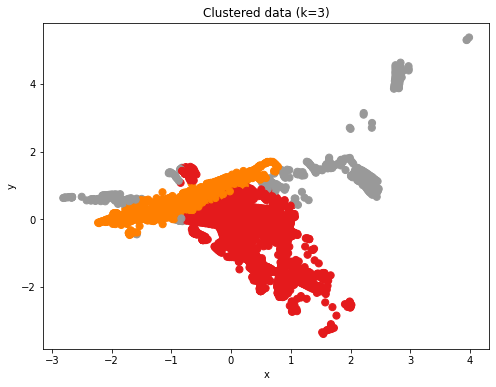

In [6]:
import matplotlib.pyplot as plt

# '0' 대신에 정수 인덱스를 사용하여 코드 수정
plt.figure(figsize=(8, 6))
plt.scatter(x=train.iloc[:, 0], y=train.iloc[:, 1], c=pred, cmap='Set1', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clustered data (k=3)')
plt.show()
